# 问题：
1.哪些因素可能会让船上的人生还率更高？
2.不同等级舱位会影响船上人的生还率吗？
3.年龄怎样影响生还率？
4.性别对生还率有影响吗？
5.可以用这些指标来预测生存率吗？准确率有多少？

In [63]:
import pandas as pd
import statsmodels.api as sm

In [64]:
import pylab as pl
import numpy as np

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
titanic_df = pd.read_csv('titanic-data.csv')

In [67]:
#查看数据的大体情况
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 分析
可以发现，Age、Cabin和Embarked三列的数据少于891个，有缺失值，应去除缺失值。而Cabin一列由于缺失信息太多，为了利用余下的数据进行分析，这一列的数据我们将不使用。。

In [68]:
#去除缺失年龄的数据集
titanic_df = titanic_df[ titanic_df['Age']>= 0]
#删除Cabin列
del titanic_df['Cabin']

In [69]:
#发现Embarked中还存在缺失值
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [70]:
#按老师指导删除Embarked中的缺失值
titanic_df.dropna(subset=['Embarked'],inplace=True)

In [71]:
#用访问每一行的方法删除缺失值
'''for index,row in titanic_df.iterrows():
    if not(row['Embarked'] == 'S'or row['Embarked'] =='C'or row['Embarked'] =='Q'):
        print(index,row['PassengerId'])#返回被删除行的索引和Id
        titanic_df.drop([index],axis=0,inplace=True)'''

"for index,row in titanic_df.iterrows():\n    if not(row['Embarked'] == 'S'or row['Embarked'] =='C'or row['Embarked'] =='Q'):\n        print(index,row['PassengerId'])#返回被删除行的索引和Id\n        titanic_df.drop([index],axis=0,inplace=True)"

In [72]:
#已不存在缺失值还存在缺失值
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [73]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


([<matplotlib.patches.Wedge at 0x173e49782b0>,
  <matplotlib.text.Text at 0x173e609c9e8>])

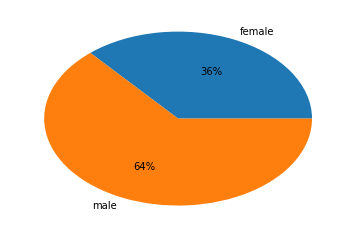

In [74]:
#男女的人口分布
by_sex = titanic_df.groupby('Sex',as_index =False)['Survived'].count()
plt.pie(by_sex['Survived'],labels = by_sex['Sex'],autopct='%.0f%%')

## 分析:
从饼状图可以看出，处理后的数据中女性占比为37%，男性占比为63%，说明船上有较多的男性乘客。

([<matplotlib.patches.Wedge at 0x173e6191898>,
  <matplotlib.text.Text at 0x173e60cca58>])

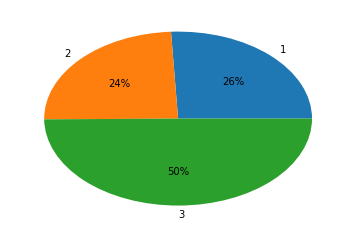

In [75]:
#舱位等级的分布
by_pclass = titanic_df.groupby('Pclass',as_index =False)['Survived'].count()
plt.pie(by_pclass['Survived'],labels = by_pclass['Pclass'],autopct='%.0f%%')

## 分析:
从饼状图可以看出，1,2,3等舱的乘客占比分别为24%，26%和50%，说明船上有一半以上的乘客属于低收入者

([<matplotlib.patches.Wedge at 0x173e61f6550>,
  <matplotlib.text.Text at 0x173e62105c0>])

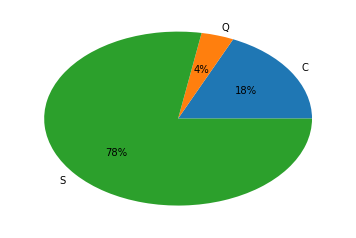

In [76]:
#登船地点
by_Embarked = titanic_df.groupby('Embarked',as_index =False)['Survived'].count()
plt.pie(by_Embarked['Survived'],labels = by_Embarked['Embarked'],autopct='%.0f%%')

## 分析:
从饼状图可以看出，78%的乘客从南安普敦登船，爱尔兰昆士敦和法国瑟堡-奥克特维尔分别只有4%和18%，泰坦尼克号的始发站是英国的南安普敦，它的乘客可能主要是英国人。

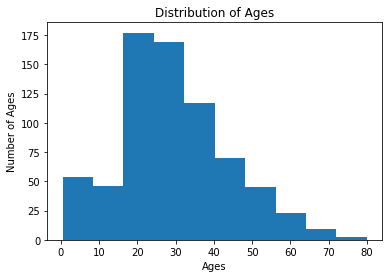

In [77]:
#年龄的分布
plt.hist(titanic_df['Age'])
plt.xlabel('Ages')
plt.ylabel('Number of Ages')
plt.title('Distribution of Ages')

## 分析:
从图中可以看出，泰坦尼克号上的乘客年龄主要集中在20-40岁。

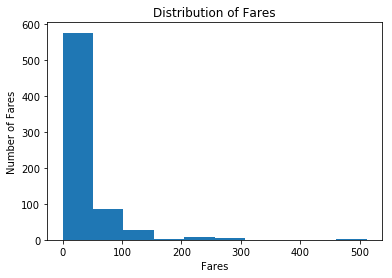

In [78]:
#票价的分布
plt.hist(titanic_df['Fare'])
plt.xlabel('Fares')
plt.ylabel('Number of Fares')
plt.title('Distribution of Fares')

## 分析:
从图中可看出来，泰坦尼克号乘客购买票价主要集中在0-50美元，这也印证了前文提到的，一半以上的乘客属于较低收入者。

In [79]:
#按社会地位分组计算生存率
group_by_pclass = titanic_df.groupby('Pclass')['Survived'].mean()
group_by_pclass

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64

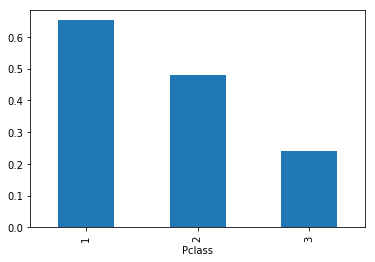

In [80]:
group_by_pclass.plot(kind='bar')

In [81]:
#比较每组计算概率时的分母，都大于5，具有比较意义
#len(titanic_df[titanic_df['Pclass']==1])
by_pclass

,Pclass,Survived
0,1,184
1,2,173
2,3,355


## 分析:
从图中可看出来，泰坦尼克号上的乘客随着社会地位降低，其生还率依次降低，这可能是因为高级舱位往往在船的上层，相对于低级舱位人多，逃生路线长，他们更容易逃生。而且上层社会人士有更多的社交活动，他们当时可能正好在船上层的餐厅。

In [82]:
#按性别分组计算生存率
group_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
group_by_sex

Sex
female    0.752896
male      0.205298
Name: Survived, dtype: float64

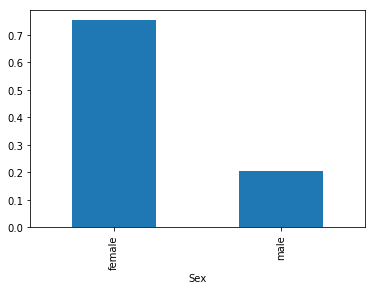

In [83]:
group_by_sex.plot(kind='bar')

In [84]:
#比较每组计算概率时的分母，都大于5，具有比较意义
by_sex

,Sex,Survived
0,female,259
1,male,453


## 分析：
从图中可以看到，船上女性的生存概率远远高于男性，高达70%，而男性只有20%，这说明当时船上让妇女和儿童先走的美德起了很好的作用，同时船上女性较少，也便于她们疏散。

In [85]:
#按是否有同伴分组计算生存率
group_by_alone = titanic_df.groupby('SibSp')['Survived'].mean()
group_by_alone

SibSp
0    0.368870
1    0.530055
2    0.440000
3    0.333333
4    0.166667
5    0.000000
Name: Survived, dtype: float64

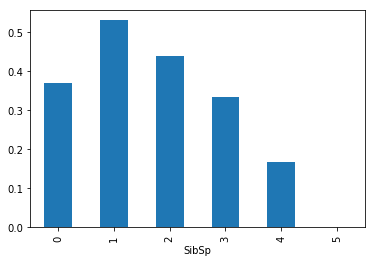

In [86]:
group_by_alone.plot(kind='bar')

In [87]:
#比较每组计算概率时的分母，都大于或等于5，具有比较意义
titanic_df.groupby('SibSp')['Survived'].count()

SibSp
0    469
1    183
2     25
3     12
4     18
5      5
Name: Survived, dtype: int64

## 分析：
从图中可以看到，有一个同伴的生存率最高，同伴过多反而生存率会降低，具体为什么会是这样需要查看更多的数据。

In [88]:
#按上船地点分组计算生存率
group_by_embark = titanic_df.groupby('Embarked')['Survived'].mean()
group_by_embark 

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

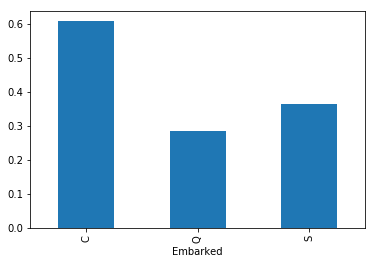

In [89]:
group_by_embark.plot(kind='bar')

In [90]:
#比较每组计算概率时的分母，都大于5，具有比较意义
titanic_df.groupby('Embarked')['Survived'].count()

Embarked
C    130
Q     28
S    554
Name: Survived, dtype: int64

## 分析：
从图中可以看到，从法国瑟堡上岸的乘客生还率远高于从英国和爱尔兰上岸的乘客，几乎为它们的两倍，高达60%，下面将数据分组后的进一步分析表明，从瑟堡上船的乘客购买一等舱的比例也明显的高于其他两个地方的（C 56.9% Q 7.1% S 19.4% ），说明这可能是和乘客的社会地位有关,社会地位高的乘客有更高的生还率。

In [91]:
#生还的人的数据集
survived_df = titanic_df[ titanic_df['Survived'] == 1 ]
#未生还的人的数据集
not_survived_df = titanic_df[ titanic_df['Survived'] == 0 ]
#男性和女性的数据集
male_df = titanic_df[ titanic_df['Sex'] == 'male' ]
female_df = titanic_df[ titanic_df['Sex'] == 'female' ]
#按年龄分类的数据集
children_df = titanic_df[ titanic_df['Age'] <= 12]
juvenile_df = titanic_df[(titanic_df['Age'] > 12) & (titanic_df['Age'] < 18)]
adults_df = titanic_df[(titanic_df['Age'] >= 18) & (titanic_df['Age'] < 65)]
agedness_df = titanic_df[titanic_df['Age'] >= 65]
#按社会地位分类的数据集
upper_df = titanic_df[titanic_df['Pclass'] == 1]
middle_df = titanic_df[titanic_df['Pclass'] == 2]
low_df = titanic_df[titanic_df['Pclass'] == 3]
#独行的和与家人结伴而行的数据集
alone_df = titanic_df[(titanic_df['SibSp'] == 0 ) & (titanic_df['Parch'] == 0)]
not_alone_df = titanic_df[(titanic_df['SibSp'] > 0 ) | (titanic_df['Parch'] > 0)]
#从不同港口登陆的人数据集
C_df = titanic_df[titanic_df['Embarked'] == 'C']
Q_df = titanic_df[titanic_df['Embarked'] == 'Q']
S_df = titanic_df[titanic_df['Embarked'] == 'S']

In [92]:
#计算生存率的函数
def survival(data):
    num_survived = data['Survived'].sum()
    survive_rate = num_survived/len(data)
    return survive_rate
#计算生存数量的函数
def survival_num(data):
    num_survived = data['Survived'].sum()
    return num_survived
#计算两个变量值之间的相关性的函数
def correlation(x, y):
    x = (x - x.mean())/x.std(ddof=0)
    y = (y - y.mean())/y.std(ddof=0)
    z = (x * y).mean()
    return z


In [93]:
#计算每个等级舱位中不同地点上船乘客的生存率
'''def rate(data_df,key,data):
    new_df = data_df[data_df[key] == data ]
    #for test
    #print(new_df.head())
    survive_rate = len(new_df)/len(data_df)
    return survive_rate

print('Upper of C_df:',rate(C_df,'Pclass',1))
print('Upper of Q_df:',rate(Q_df,'Pclass',1))
print('Upper of S_df:',rate(S_df,'Pclass',1))'''
#按指导中的代码
titanic_df.groupby(['Pclass','Embarked'])['Survived'].mean()

Pclass  Embarked
1       C           0.716216
        Q           0.500000
        S           0.611111
2       C           0.533333
        Q           0.500000
        S           0.474359
3       C           0.439024
        Q           0.250000
        S           0.210345
Name: Survived, dtype: float64

In [94]:
#每个地方登录乘客的人数
titanic_df.groupby('Embarked')['Survived'].count()

Embarked
C    130
Q     28
S    554
Name: Survived, dtype: int64

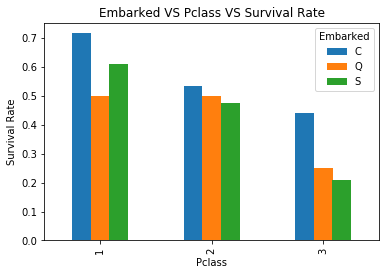

In [95]:
titanic_df.groupby(['Pclass','Embarked'])['Survived'].mean().unstack().plot(kind='bar')
plt.title('Embarked VS Pclass VS Survival Rate')
plt.ylabel('Survival Rate')
plt.show()

## 分析
可以看出，一等舱的生存的生存率明显较高，Queenstown上船的人太少，不太具有可比性，数据中看出，同为一种舱位的乘客，Cherbourg上船的乘客生存率要高于Southampton，但差异不大，具体是否有影响需要进一步分析。

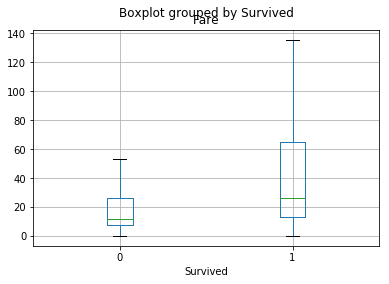

In [96]:
#按生存与否分类的箱形图
titanic_df.boxplot(column = 'Fare', by = 'Survived',showfliers=False)

## 分析
从箱形图中可以看出，生存乘客的票价中位数相对较高，整体分布上也处于较高价格的位置，票价分布的范围更广，这也印证了生还者中有更多一等舱的乘客。

([<matplotlib.patches.Wedge at 0x173e6743710>,
  <matplotlib.text.Text at 0x173e675b8d0>])

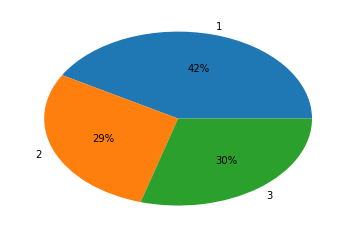

In [97]:
#生还者中的舱位等级分布
by_survived = survived_df.groupby('Pclass',as_index =False)['Survived'].count()
plt.pie(by_survived['Survived'],labels = by_survived['Pclass'],autopct='%.0f%%')

## 分析:
之前所有乘客的1,2,3等舱的乘客占比分别为24%，26%和50%，而在生存的乘客中，一等舱内乘客占比提升到了42%，说明一等舱的乘客生还率确实较高。

In [98]:
#用简化的代码对年龄进行分割，这里还是按照讲师给的分段，因为比较好做图
bins = np.arange(0,90,10)
bins

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [99]:
titanic_df['Age_group'] = pd.cut(titanic_df['Age'],bins)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,"(30, 40]"


In [100]:
by_age = titanic_df.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.441558
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.187500
(70, 80]    0.200000
Name: Survived, dtype: float64

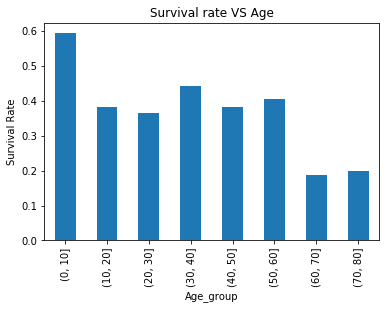

In [101]:
by_age.plot(kind = 'bar')
plt.title('Survival rate VS Age')
plt.ylabel('Survival Rate')

## 分析
从图中可以看出，儿童的生还率很高，其次是10-60岁的青壮年，老人的生还率很低。年轻人身强力壮，生存率较高，而儿童得到了良好的优先保护。

In [102]:
#将Sex换成0，1
sex_mapping = {
    'male':1,
    'female':0
}
titanic_df['Sex']=titanic_df['Sex'].map(sex_mapping)

In [103]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,"(30, 40]"


In [104]:
#计算两个变量值之间的相关性
'''print('Survived vs Age',correlation(titanic_df['Survived'],titanic_df['Age']))
print('Survuved vs Sex',correlation(titanic_df['Survived'],titanic_df['Sex']))
print('Survuved vs Pclass',correlation(titanic_df['Survived'],titanic_df['Pclass']))
print('Survuved vs Sib sp',correlation(titanic_df['Survived'],titanic_df['SibSp']))
print('Survuved vs Parch',correlation(titanic_df['Survived'],titanic_df['Parch']))
print('Survuved vs Fare',correlation(titanic_df['Survived'],titanic_df['Fare']))'''

titanic_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.024674,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893
Sex,0.024674,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457
Age,0.033681,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000


## 分析：
从数据中可以看到性别、社会经济地位和票价与生存率有强烈的相关性，不能通过这以数据就断定是因为这几个指标影可以直接影响生存率，因为可能会有其他隐含的共同因素在同时影响生存率和这几个指标，比如说社会观念要求强者帮助弱者。可以这些指标可以用来做进一步的预测。

In [105]:
#删除无关列
del titanic_df['Name']
del titanic_df['Ticket']
#del well_titanic_df['']

In [106]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,1,0,3,1,22.0,1,0,7.2500,S,"(20, 30]"
1,2,1,1,0,38.0,1,0,71.2833,C,"(30, 40]"
2,3,1,3,0,26.0,0,0,7.9250,S,"(20, 30]"
3,4,1,1,0,35.0,1,0,53.1000,S,"(30, 40]"
4,5,0,3,1,35.0,0,0,8.0500,S,"(30, 40]"


# 尝试用性别、年龄和票价高低对生还率进行逻辑回归

In [107]:
#构建数据集
X = pd.DataFrame()
X['sex'] = titanic_df['Sex']
X['age'] = titanic_df['Age']
X['survived'] = titanic_df['Survived']
X['fare'] = titanic_df['Fare']

In [108]:
X.head()

,sex,age,survived,fare
0,1,22.0,0,7.2500
1,0,38.0,1,71.2833
2,0,26.0,1,7.9250
3,0,35.0,1,53.1000
4,1,35.0,0,8.0500


In [109]:
y = X['survived']
X = X.drop(['survived'],axis=1)

In [110]:
#将个变量调整到同一数量级
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\huang\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [111]:
#建立训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [112]:
#构建一个将全部人预测为死亡的基准模型便于测试效果
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [113]:
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print('Base rate accuracy is %2.2f' %accuracy_score(y_test,y_base_rate))

Base rate accuracy is 0.56


## 分析：
基准模型的准确率为61%

In [114]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',C=1)

In [115]:
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
print('Logistic accuracy is %2.2f' %accuracy_score(y_test,model.predict(X_test)))

Logistic accuracy is 0.76


## 分析：
基准模型的准确率为75%

In [117]:
#模型比较
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [118]:
print("---Base Model---")
#base rate AUC
base_roc_auc = roc_auc_score(y_test,base_rate_model(X_test))
print("Base Rate AUC = %2.2f"%base_roc_auc)
print(classification_report(y_test,base_rate_model(X_test)))
print("\n\n---Logistic Model---")
#logistic AUC
logit_roc_auc = roc_auc_score(y_test,model.predict(X_test))
print("Logistic AUC = %2.2f" %logit_roc_auc)
print(classification_report(y_test,model.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.56      1.00      0.72        80
          1       0.00      0.00      0.00        63

avg / total       0.31      0.56      0.40       143



---Logistic Model---
Logistic AUC = 0.74
             precision    recall  f1-score   support

          0       0.75      0.84      0.79        80
          1       0.76      0.65      0.70        63

avg / total       0.76      0.76      0.75       143



C:\Users\huang\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 分析：
逻辑回归的准确率和AUC值相比基准模型都较好，分别为75%和0.74，具有比较好的预测效果

In [119]:
#绘制ROC图表
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

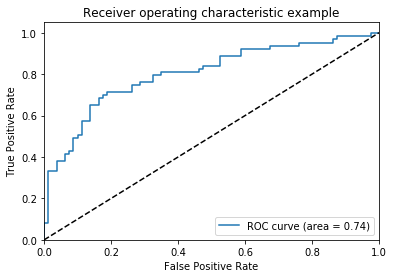

In [120]:
# ROC曲线图
plt.figure()
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## 分析：
从图中可以看出，ROC曲线向左上方凹陷，整体的AUC达到0.74，该逻辑回归具有比较好的效果

# 综上所述：
#### 1.性别、票价和社会地位都会影响生还率，女性的生还率更高，购买票价越高生还率越高，社会地位越高生还率越高，但这里不能判断他们之间的因果关系。购买票价高可能是因为乘客本来就具有较高的社会地位。具体的因果关系需要更多的数据来判断，现在只发现它们之间具有很强的相关性。
#### 2.不同等级舱位可能会影响船上人的生还率，舱位等级越高（经济条件越好），生还率越高，这可能是跟高级仓位在船的上层，低级舱位在船的下层，而海水是从泰坦尼克底部灌上取得，下层舱位不易逃生有关。目前的结论只能作为暂时的猜测以供参考。
#### 3.年龄与生还率没有明显的相关性。
#### 4.性别与生还率有明显的相关性，女性的生还率（75%）明显高于男性（21%），可能跟当时“让妇女和儿童”先走的美德有关。
#### 5.可以用这些指标来预测生存率，逻辑回归预测的准确率能达到75%（AUC=0.74）

### 注：逻辑回归以及对ROC曲线的解释参考了Youtube上的教程，链接如下：https://www.youtube.com/watch?v=yLsKZTWyEDg    https://www.youtube.com/watch?v=OAl6eAyP-yo